# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [22]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares (takster)
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [23]:
import pandas as pd
import pyarrow.parquet as pq
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02',]
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [24]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [25]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


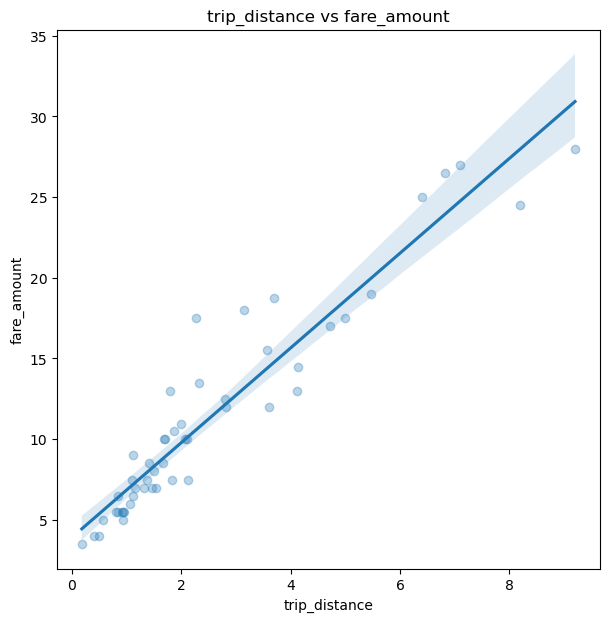

In [26]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

In [27]:
#Ovenstående kan hjælpe med at identificere, om der er en fast prisstruktur eller en variabel prissætning baseret på afstanden.

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

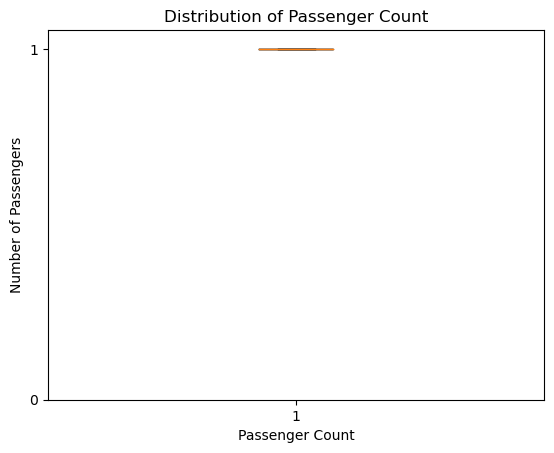

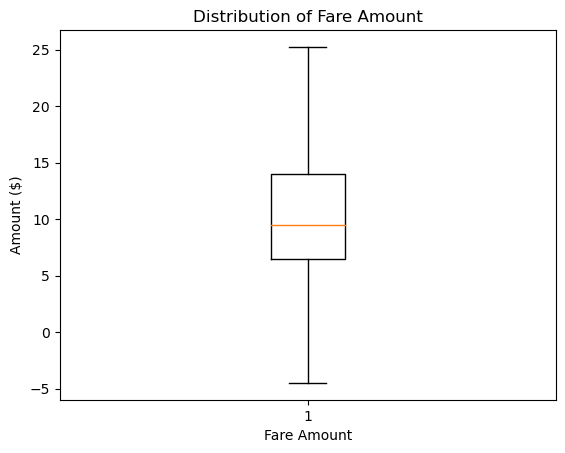

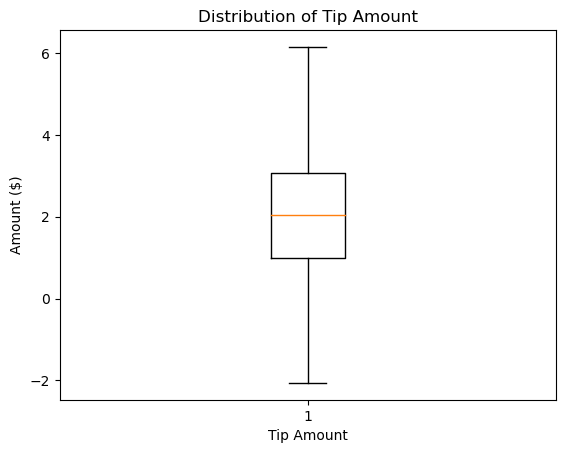

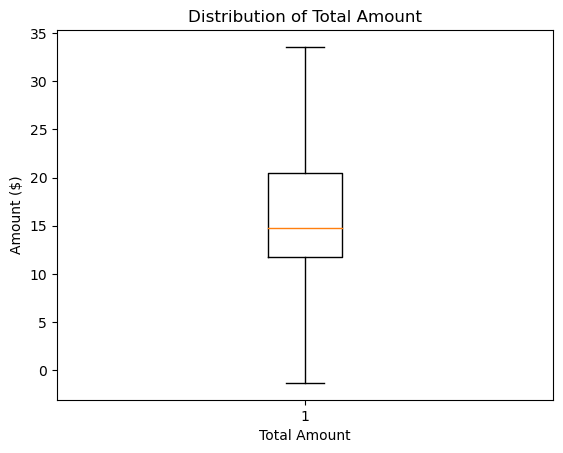

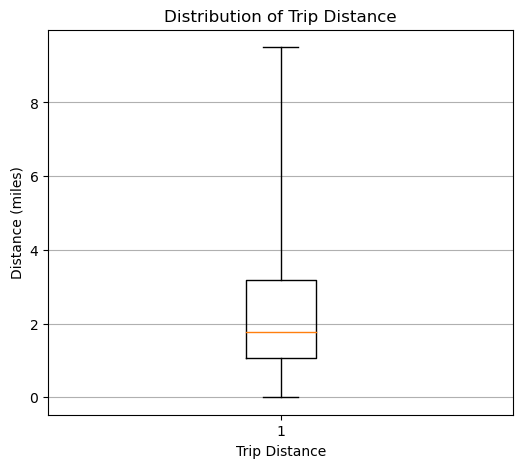

count    5.443362e+06
mean     5.635142e+00
std      6.015312e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.770000e+00
75%      3.170000e+00
max      3.487985e+05
Name: trip_distance, dtype: float64

In [28]:
import matplotlib.pyplot as plt

filtered_df = df_yellow[(df_yellow['passenger_count'] <= 1) & (df_yellow['passenger_count'] <= 10)]
plt.boxplot(filtered_df['passenger_count'], sym='')
plt.yticks(range(int(filtered_df['passenger_count'].min()), int(filtered_df['passenger_count'].max())+1))
plt.xlabel('Passenger Count')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Count')
plt.show()

plt.boxplot(df_yellow['fare_amount'], sym='')
plt.xlabel('Fare Amount')
plt.ylabel('Amount ($)')
plt.title('Distribution of Fare Amount')
plt.show()

plt.boxplot(df_yellow['tip_amount'], sym='')
plt.xlabel('Tip Amount')
plt.ylabel('Amount ($)')
plt.title('Distribution of Tip Amount')
plt.show()

plt.boxplot(df_yellow['total_amount'], sym='')
plt.xlabel('Total Amount')
plt.ylabel('Amount ($)')
plt.title('Distribution of Total Amount')
plt.show()

plt.figure(figsize=(6, 5))  # Adjust the size as needed
plt.boxplot(df_yellow['trip_distance'], sym='', whis=3)

plt.xlabel('Trip Distance')
plt.ylabel('Distance (miles)')
# Tilføj gridlines for at tydeliggøre kvartiler
plt.grid(True, axis='y')
plt.title('Distribution of Trip Distance')
plt.show()

df_yellow['trip_distance'].describe()

#Vi vil gerne have tal på vores boksplot men hvordan gør vi det. 
#vi har negative passenger_counts??? og det ligner den tæller mean. 1,25??? 

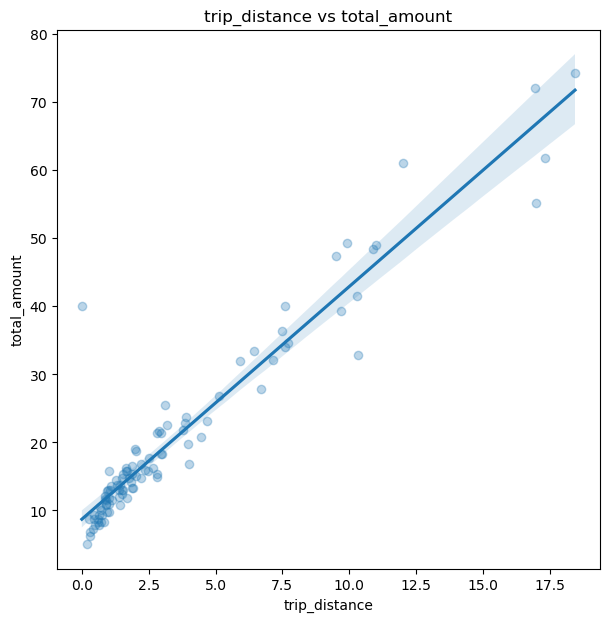

In [29]:
# Write your code
# (Doyin)
#distribution of trip distances:
#distance per måned, 
 
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(100), 
    x_col = 'trip_distance', 
    y_col = 'total_amount', 
    title = 'trip_distance vs total_amount', 
    xlabel = 'trip_distance',
    ylabel = 'total_amount',
)


In [30]:
#import matplotlib.pyplot as plt

# Beregn trip duration i minutter
#df_green['trip_duration_minutes'] = df_green['trip_duration_sec'] / 60

# Plot trip duration og total amount
#plt.scatter(df_green['trip_duration_minutes'], df_green['total_amount'])
#plt.xlabel('Trip Duration (minutes)')
#plt.ylabel('Total Amount')
#plt.title('Trip Duration vs. Total Amount')
#plt.show()

In [31]:
# Konverter kolonnerne til datetime-format
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])

# Beregn trip duration ved at trække pickup-tidspunktet fra dropoff-tidspunktet
df_green['trip_duration'] = (df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']).dt.total_seconds()

In [32]:
df_green_sample = df_green.sample(90)
df_green_sample=df_green_sample[df_green_sample.trip_duration < 2000]
df_green_sample=df_green_sample[df_green_sample.trip_distance < 100]
df_green_sample=df_green_sample[df_green_sample.tip_amount>0]


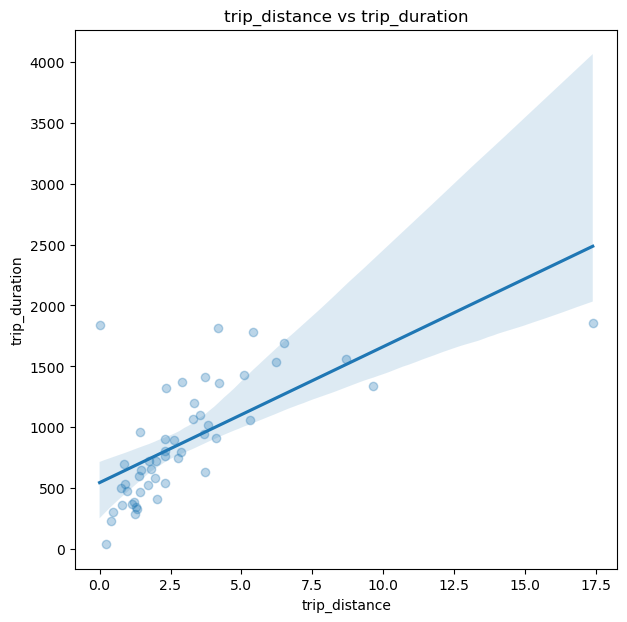

In [33]:
import matplotlib.pyplot as plt
import pandas as pd


create_scatterplot(
    df_green_sample, 
    x_col = 'trip_distance', 
    y_col = 'trip_duration', 
    title = 'trip_distance vs trip_duration', 
    xlabel = 'trip_distance',
    ylabel = 'trip_duration',
)

In [34]:
# remove negative outliers 
df_yellow = df_yellow[df_yellow.tip_amount>0]
negative_tip_rows = df_green[df_green["tip_amount"] < 0]

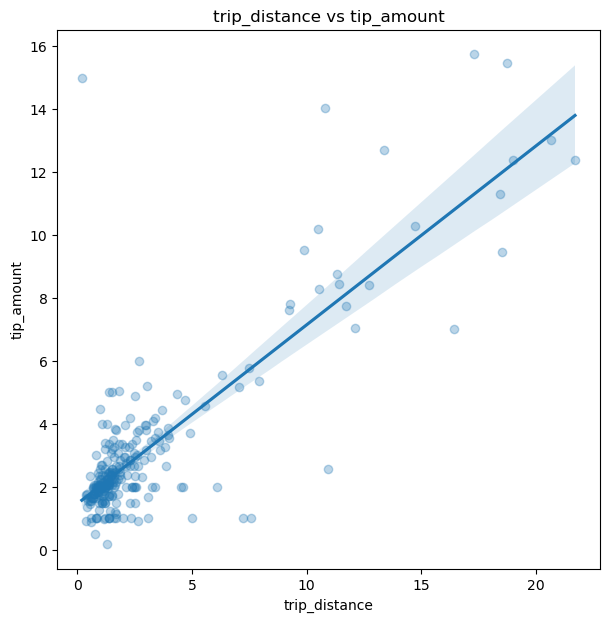

In [35]:

import matplotlib.pyplot as plt
import pandas as pd


create_scatterplot(
    df_yellow.sample(250), 
    x_col = 'trip_distance', 
    y_col = 'tip_amount', 
    title = 'trip_distance vs tip_amount', 
    xlabel = 'trip_distance',
    ylabel = 'tip_amount',
)



In [36]:
df_green = df_green.sample(20000)
df_green = df_green[df_green.tip_amount>=0]
df_green =df_green[df_green.payment_type>=0] #filtrer fordi one payment type was nan, empty. So we removed it. 


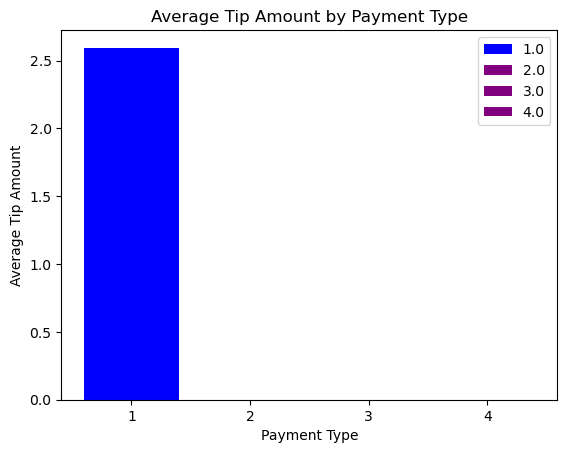

In [37]:

import matplotlib.pyplot as plt

# Grupper data efter payment type og beregn gennemsnittet af tip amount for hver gruppe
grouped_data = df_green.groupby('payment_type')['tip_amount'].mean()

# Opret en liste over farver/mønstre for hver betalingstype
colors = ['b', 'g', 'c', 'r', 'p']

# Plot gennemsnittet af tip amount for hver payment type
fig, ax = plt.subplots()
for i, payment_type in enumerate(grouped_data.index):
    tip_amount = grouped_data[payment_type]
    if tip_amount == 0:
        ax.bar(payment_type, tip_amount, color='purple')
    else:
        ax.bar(payment_type, tip_amount, color=colors[i % len(colors)])

ax.set_xlabel('Payment Type')
ax.set_ylabel('Average Tip Amount')
ax.set_title('Average Tip Amount by Payment Type')
ax.set_xticks(grouped_data.index)
ax.legend(grouped_data.index)

plt.show()



In [38]:
print(df_green['payment_type'].value_counts())

1.0    11004
2.0     6823
3.0       73
4.0       32
Name: payment_type, dtype: int64


In [39]:
#print(df_green['tipamount'].values) når payment type er 1 og 2

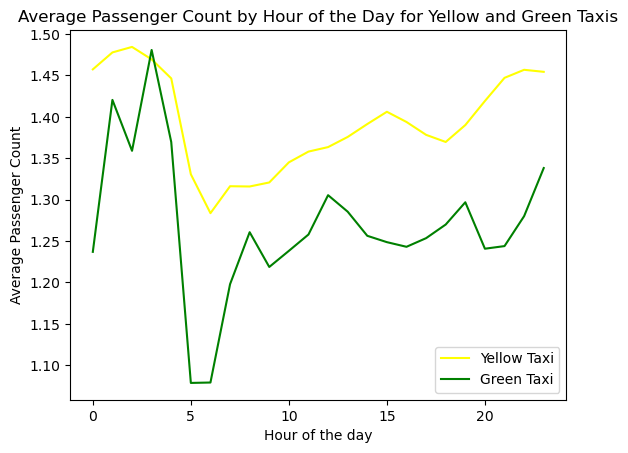

In [49]:
#Passenger counts (Andreas)
#1. Creating Line plot that displays passenger count by hour of the day

# Calculating trip duration for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])
df_yellow['trip_duration'] = df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']
df_yellow['trip_duration_minutes'] = df_yellow['trip_duration'].dt.total_seconds() / 60
grouped_data_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

# Calculating trip duration for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])
df_green['trip_duration'] = df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']
df_green['trip_duration_minutes'] = df_green['trip_duration'].dt.total_seconds() / 60
grouped_data_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

#Plotting the average passenger counts for both yellow and green taxis on the same graph
plt.plot(grouped_data_yellow.index, grouped_data_yellow.values, color='yellow', label='Yellow Taxi')
plt.plot(grouped_data_green.index, grouped_data_green.values, color='green', label='Green Taxi')
plt.xlabel('Hour of the day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour of the Day for Yellow and Green Taxis')
plt.legend()
plt.show()



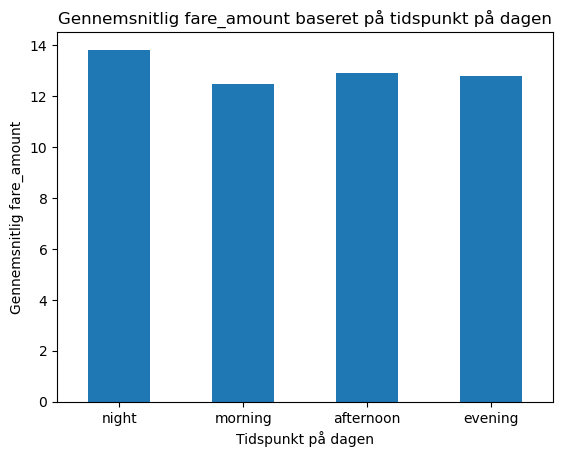

In [50]:
import matplotlib.pyplot as plt

# Konverter pick up_time til datetime-format
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Opret en ny kategori for tidspunkt på dagen (morgen, eftermiddag, aften, nat)
df_yellow['time_category'] = pd.cut(df_yellow['tpep_pickup_datetime'].dt.hour,
 bins=[0, 6, 12, 18, 24],
 labels=['night', 'morning', 'afternoon', 'evening'],
 right=False)

# Grupper data efter tidspunkt på dagen og beregn gennemsnitlig fare_amount
fare_by_time = df_yellow.groupby('time_category')['fare_amount'].mean()

# Lav en søjlediagram for at visualisere gennemsnitlig fare_amount baseret på tidspunkt på dagen
fare_by_time.plot(kind='bar', rot=0)
plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount baseret på tidspunkt på dagen')
plt.show()

In [51]:
print(df_yellow['payment_type'].value_counts())
df_yellow[df_yellow['payment_type'].notna()]
df_yellow =df_yellow[df_yellow.fare_amount>0]

1    4009871
0     150248
2         46
3         13
4          1
Name: payment_type, dtype: int64


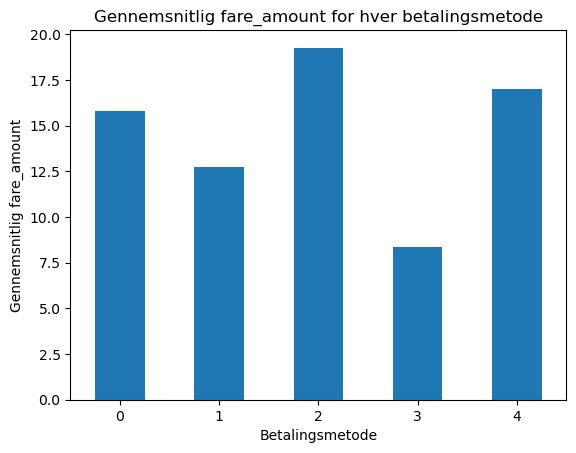

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer DataFrame baseret på payment_type og fjern rækker med manglende værdier


# Lav en søjlediagram for at visualisere fare_amount for hver betalingsmetode
df_yellow.groupby('payment_type')['fare_amount'].mean().plot(kind='bar', rot=0)

plt.xlabel('Betalingsmetode')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount for hver betalingsmetode')

plt.show()

In [44]:
#the relationship between these variables: (Yasemin)

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [45]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [10]:
# Write your code
!pip install keplergl
import pandas as pd

#Indsæt datasæt i en csv fil

#Importer keplergl map med højde og navn (map1)

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

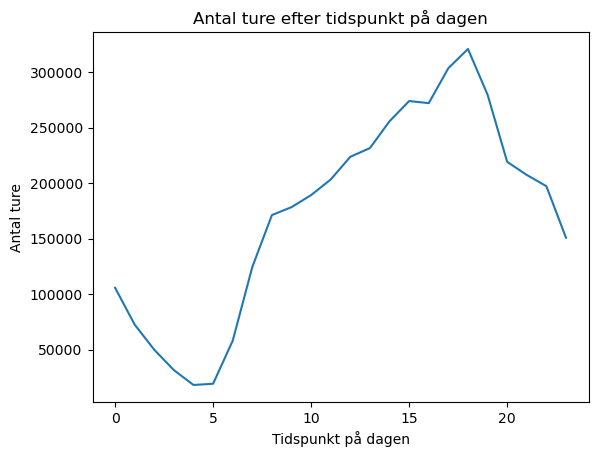

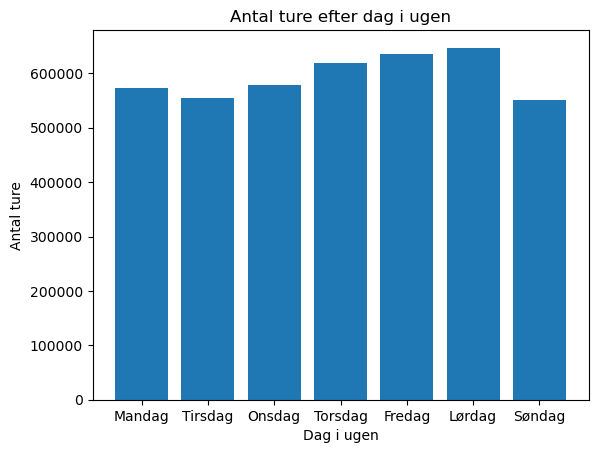

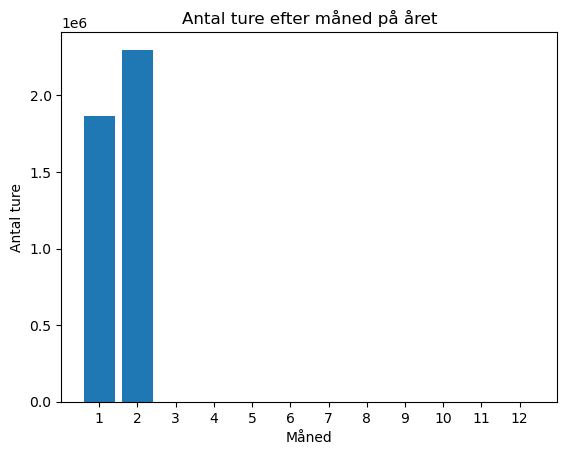

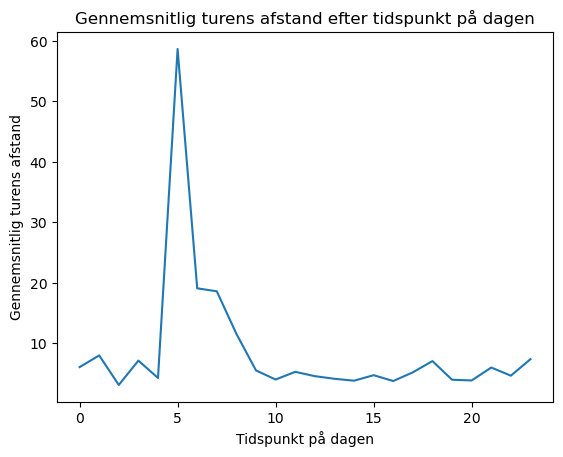

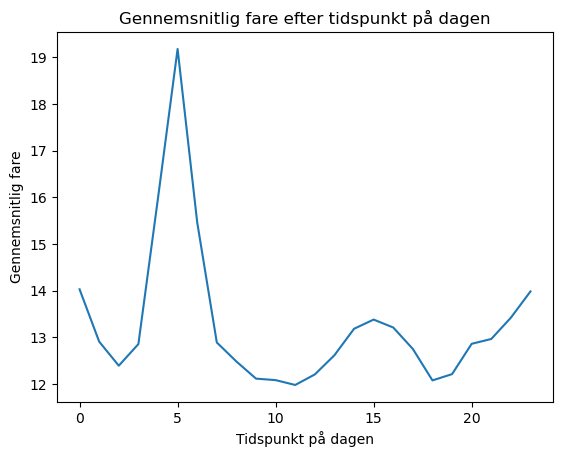

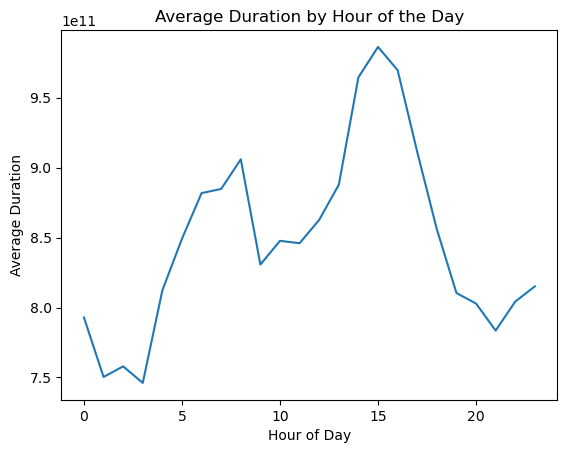

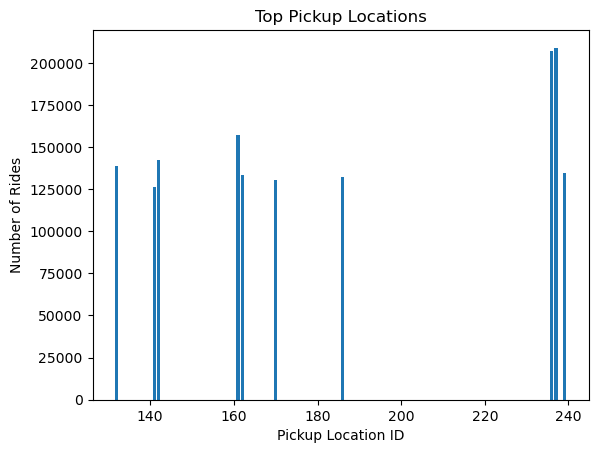

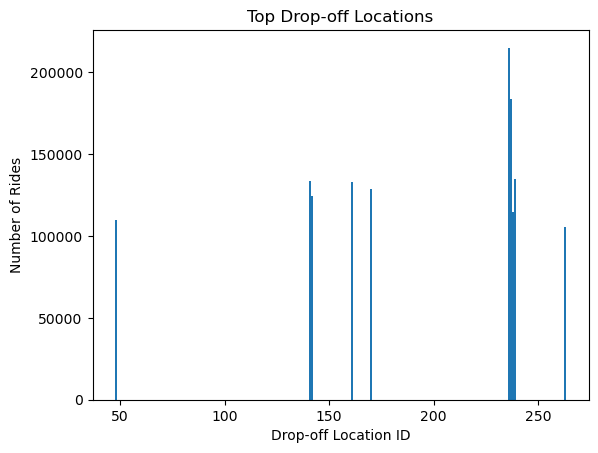

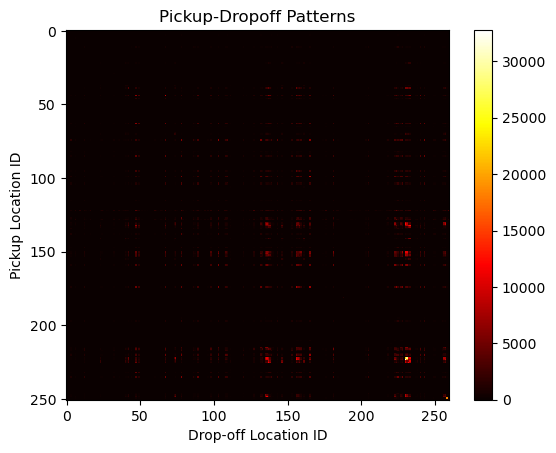

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs data fra din DataFrame (f.eks. df) og de relevante kolonner (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Analyser antallet af ture efter tidspunkt på dagen
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour = df_yellow['hour_of_day'].value_counts().sort_index()

# Lav et linjediagram for at vise antallet af ture efter tidspunkt på dagen
plt.plot(rides_by_hour.index, rides_by_hour.values)
plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter tidspunkt på dagen')
plt.show()

# Analyser antallet af ture efter dag i ugen
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
rides_by_day = df_yellow['day_of_week'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter dag i ugen
plt.bar(rides_by_day.index, rides_by_day.values)
plt.xlabel('Dag i ugen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter dag i ugen')
plt.xticks(range(7), ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag'])
plt.show()

# Analyser antallet af ture efter måned på året
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month
rides_by_month = df_yellow['month'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter måned på året
plt.bar(rides_by_month.index, rides_by_month.values)
plt.xlabel('Måned')
plt.ylabel('Antal ture')
plt.title('Antal ture efter måned på året')
plt.xticks(range(1, 13))
plt.show()

# Analyser forholdet mellem tidsmæssige mønstre og trip distance
avg_distance_by_hour = df_yellow.groupby('hour_of_day')['trip_distance'].mean()

# Lav et linjediagram for at vise det gennemsnitlige turens afstand efter tidspunkt på dagen
plt.plot(avg_distance_by_hour.index, avg_distance_by_hour.values)
plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig turens afstand')
plt.title('Gennemsnitlig turens afstand efter tidspunkt på dagen')
plt.show()

# Analyser forholdet mellem tidsmæssige mønstre og fare
avg_fare_by_hour = df_yellow.groupby('hour_of_day')['fare_amount'].mean()

# Lav et linjediagram for at vise den gennemsnitlige fare efter tidspunkt på dagen
plt.plot(avg_fare_by_hour.index, avg_fare_by_hour.values)
plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig fare')
plt.title('Gennemsnitlig fare efter tidspunkt på dagen')
plt.show()


avg_duration_by_hour = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Create a line plot to visualize the average duration by hour of the day
plt.plot(avg_duration_by_hour.index, avg_duration_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration')
plt.title('Average Duration by Hour of the Day')
plt.show()


# Top pickup locations
top_pickup_locations = df_yellow['PULocationID'].value_counts().nlargest(10)
# Top drop-off locations
top_dropoff_locations = df_yellow['DOLocationID'].value_counts().nlargest(10)

# Create bar plots to visualize the top pickup locations
plt.bar(top_pickup_locations.index, top_pickup_locations.values)
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Rides')
plt.title('Top Pickup Locations')
plt.show()

# Create bar plots to visualize the top drop-off locations
plt.bar(top_dropoff_locations.index, top_dropoff_locations.values)
plt.xlabel('Drop-off Location ID')
plt.ylabel('Number of Rides')
plt.title('Top Drop-off Locations')
plt.show()


# Create a cross-tabulation of pickup and drop-off locations
pickup_dropoff_counts = pd.crosstab(df_yellow['PULocationID'], df_yellow['DOLocationID'])

# Create a heatmap to visualize the pickup-dropoff patterns
plt.imshow(pickup_dropoff_counts, cmap='hot', interpolation='nearest')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Pickup Location ID')
plt.title('Pickup-Dropoff Patterns')
plt.colorbar()
plt.show()




### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [10]:
#pip install fbprophet

In [11]:
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly
#import plotly.offline as py
#py.init_notebook_mode()

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.